Capstone Project 1: What effect does spending have on student achievement?
The purpose of this project is to see what effect the amount of money a state spends on education will have an impact on how well students do on their reading and math scores.  To test this I will be looking at the avg_math_8_score and avg_reading_8_score (average scores in 8th grade math and reading.  I started off focusing in on a single year (2015) and cleaning up the data.  After I did my initial analysis and got a feel for what I was working with (using a smaller subset of the data) I used all the datapoints to get a full sample size.  I ran correlation tests and created a couple of visualizations.  

As I was researching this information I ended up finding a new avenue to explore.  At the end I decided to run a t-test and see if there was a relationship between students scoring high on their 8th Grade Math test and their 8th Grade reading tests.  The Null hypothesis for this is that the two test scores have no effect on each other. 

In [1]:
conda install -c damianavila82 rise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Here I am importing the states_all.csv
states = pd.read_csv('states_all.csv')

In [4]:
# I am going to first get the information from this dataset to see the columns
# and values that I have along with the number of rows and columns 
states.info()
states.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

(1492, 25)

I am going to start by focusing on one year to get comfortable with the information and then expand to include more datapoints.

In [5]:
# My focus is going to be on just the year 2015 so I am going to make a 
# separate variable that just includes that year

edu_2015 = states[states['YEAR'] == 2015]
edu_2015.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1178,2015_ALABAMA,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,...,55808.0,55792.0,50668.0,452764.0,222182.0,688176.0,230.977423,266.555319,217.049090,269.020028
1179,2015_ALASKA,ALASKA,2015,130755.0,2920986.0,344111.0,2026555.0,550320.0,2968341.0,1484610.0,...,10118.0,9400.0,9651.0,80011.0,38688.0,122068.0,236.328417,280.493456,212.792600,258.753762
1180,2015_ARIZONA,ARIZONA,2015,944978.0,8230507.0,1093834.0,3232013.0,3904660.0,7902600.0,3846357.0,...,86594.0,84084.0,84854.0,687144.0,333579.0,1029470.0,237.611755,282.919489,215.311336,260.317019
1181,2015_ARKANSAS,ARKANSAS,2015,479682.0,5308625.0,581412.0,4075118.0,652095.0,5350543.0,2620399.0,...,35893.0,36882.0,32385.0,296050.0,142242.0,454375.0,235.215470,275.064756,218.077496,262.769392
1182,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,NaN,231.549345,275.324573,212.677949,258.768268


In [6]:
# I am going to make all of the columns lowercase to make it simpler to type
edu_2015.columns = edu_2015.columns.str.lower()
edu_2015.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
1178,2015_ALABAMA,ALABAMA,2015,734974.0,7360222.0,795238.0,4080167.0,2484817.0,7501799.0,3817479.0,...,55808.0,55792.0,50668.0,452764.0,222182.0,688176.0,230.977423,266.555319,217.049090,269.020028
1179,2015_ALASKA,ALASKA,2015,130755.0,2920986.0,344111.0,2026555.0,550320.0,2968341.0,1484610.0,...,10118.0,9400.0,9651.0,80011.0,38688.0,122068.0,236.328417,280.493456,212.792600,258.753762
1180,2015_ARIZONA,ARIZONA,2015,944978.0,8230507.0,1093834.0,3232013.0,3904660.0,7902600.0,3846357.0,...,86594.0,84084.0,84854.0,687144.0,333579.0,1029470.0,237.611755,282.919489,215.311336,260.317019
1181,2015_ARKANSAS,ARKANSAS,2015,479682.0,5308625.0,581412.0,4075118.0,652095.0,5350543.0,2620399.0,...,35893.0,36882.0,32385.0,296050.0,142242.0,454375.0,235.215470,275.064756,218.077496,262.769392
1182,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,NaN,231.549345,275.324573,212.677949,258.768268


In [7]:
# Now I need to see which states have the highest total expenditure on instruction from this dataset

edu_2015.sort_values(by='total_expenditure', ascending=False)

# This gives me an idea of which states are at the top but also made me realize
# that this is kind of difficult to work with having all these additional columns

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
1182,2015_CALIFORNIA,CALIFORNIA,2015,6226523.0,78248042.0,7556365.0,42360470.0,28331207.0,78365958.0,38951948.0,...,485885.0,465322.0,492835.0,3748465.0,1941009.0,NaN,231.549345,275.324573,212.677949,258.768268
1210,2015_NEW_YORK,NEW_YORK,2015,2631532.0,63712218.0,2869847.0,25900858.0,34941513.0,65094591.0,41954260.0,...,199866.0,197997.0,189562.0,1601015.0,820402.0,2471847.0,236.796927,280.089220,222.646303,270.853712
1221,2015_TEXAS,TEXAS,2015,5004866.0,55582029.0,5830972.0,20967429.0,28783628.0,56255791.0,26745844.0,...,397085.0,386627.0,323708.0,3188705.0,1492452.0,4924653.0,244.002472,283.793540,217.942913,267.079865
1191,2015_ILLINOIS,ILLINOIS,2015,2047123.0,32096832.0,2262192.0,11858968.0,17975672.0,32410033.0,17313173.0,...,149373.0,150193.0,147993.0,1198970.0,619292.0,1905851.0,237.307814,281.968567,222.022268,257.350440
1216,2015_PENNSYLVANIA,PENNSYLVANIA,2015,1589429.0,29967185.0,1857885.0,10532452.0,17576848.0,29690645.0,16058338.0,...,130671.0,131505.0,129921.0,1047793.0,540546.0,1596540.0,243.312240,283.668415,226.670774,262.673146
1208,2015_NEW_JERSEY,NEW_JERSEY,2015,1339230.0,29335237.0,1154004.0,11423305.0,16757928.0,28809725.0,15339450.0,...,98565.0,98128.0,97602.0,790025.0,402208.0,1255517.0,245.383220,293.365938,229.487674,259.417376
1187,2015_FLORIDA,FLORIDA,2015,2743641.0,26971491.0,3118041.0,10661586.0,13191864.0,27277049.0,14931173.0,...,215435.0,206785.0,192877.0,1692825.0,839773.0,2592720.0,242.664321,275.323818,227.188969,247.653445
1213,2015_OHIO,OHIO,2015,1600222.0,24378660.0,1676820.0,10169760.0,12532080.0,22561728.0,11620080.0,...,127995.0,131692.0,119952.0,1037775.0,521595.0,1592488.0,243.598591,285.061955,224.930420,260.594557
1188,2015_GEORGIA,GEORGIA,2015,1717805.0,18584666.0,1831221.0,8310872.0,8442573.0,18501103.0,10081483.0,...,134343.0,131509.0,109345.0,1067899.0,513865.0,1628449.0,236.452519,278.711797,222.013497,277.191363
1200,2015_MICHIGAN,MICHIGAN,2015,1345009.0,19025996.0,1582706.0,10510346.0,6932944.0,17742903.0,9040821.0,...,111267.0,113640.0,114700.0,887682.0,482540.0,1419183.0,235.728894,278.168652,216.306630,267.905530


In [8]:
# The previous example shows lots of information from this dataframe but I don't
# need all of it to prove my hypothesis so I'm going to create a dataframe that
# only has the columns that I need so it is easier to work with

edu_filtered = edu_2015[['state', 'year', 'enroll', 'total_expenditure', 'avg_math_8_score', 'avg_reading_8_score']]
edu_filtered.head()

,state,year,enroll,total_expenditure,avg_math_8_score,avg_reading_8_score
1178,ALABAMA,2015,734974.0,7501799.0,266.555319,269.020028
1179,ALASKA,2015,130755.0,2968341.0,280.493456,258.753762
1180,ARIZONA,2015,944978.0,7902600.0,282.919489,260.317019
1181,ARKANSAS,2015,479682.0,5350543.0,275.064756,262.769392
1182,CALIFORNIA,2015,6226523.0,78365958.0,275.324573,258.768268


In [9]:
# Now that things are much easier to work with I am going to create a new column
# that displays the amount of money spent on a single student for each state
# This is in the thousands and includes the money spent on instructions, support services, and 

edu_filtered['money_per_student'] = edu_filtered['total_expenditure'] / edu_filtered['enroll']
edu_filtered.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,state,year,enroll,total_expenditure,avg_math_8_score,avg_reading_8_score,money_per_student
1178,ALABAMA,2015,734974.0,7501799.0,266.555319,269.020028,10.206890
1179,ALASKA,2015,130755.0,2968341.0,280.493456,258.753762,22.701549
1180,ARIZONA,2015,944978.0,7902600.0,282.919489,260.317019,8.362734
1181,ARKANSAS,2015,479682.0,5350543.0,275.064756,262.769392,11.154354
1182,CALIFORNIA,2015,6226523.0,78365958.0,275.324573,258.768268,12.585830


In [10]:
# This cell simply reorders the columns so the financial ones are all together

edu_filtered = edu_filtered[['state','year','enroll','total_expenditure','money_per_student','avg_math_8_score','avg_reading_8_score']]
edu_filtered.head()

,state,year,enroll,total_expenditure,money_per_student,avg_math_8_score,avg_reading_8_score
1178,ALABAMA,2015,734974.0,7501799.0,10.206890,266.555319,269.020028
1179,ALASKA,2015,130755.0,2968341.0,22.701549,280.493456,258.753762
1180,ARIZONA,2015,944978.0,7902600.0,8.362734,282.919489,260.317019
1181,ARKANSAS,2015,479682.0,5350543.0,11.154354,275.064756,262.769392
1182,CALIFORNIA,2015,6226523.0,78365958.0,12.585830,275.324573,258.768268


In [11]:
# Now that I have all the information I need I am going to create two separate
# Dataframes: the states that have the top 10 money_per_student and the states
# with the lowest 10 money_per_student to test my hypothesis.

top_10_edu = edu_filtered.sort_values(by='money_per_student', ascending=False).head(10)
top_10_edu



,state,year,enroll,total_expenditure,money_per_student,avg_math_8_score,avg_reading_8_score
1186,DISTRICT_OF_COLUMBIA,2015,46155.0,1360942.0,29.486340,263.059776,262.613291
1210,NEW_YORK,2015,2631532.0,65094591.0,24.736386,280.089220,270.853712
1223,VERMONT,2015,85184.0,1969415.0,23.119541,290.355191,260.655136
1179,ALASKA,2015,130755.0,2968341.0,22.701549,280.493456,258.753762
1208,NEW_JERSEY,2015,1339230.0,28809725.0,21.512156,293.365938,259.417376
1184,CONNECTICUT,2015,505366.0,10542667.0,20.861449,283.956677,268.073225
1228,WYOMING,2015,93867.0,1942406.0,20.693172,286.666547,260.185273
1216,PENNSYLVANIA,2015,1589429.0,29690645.0,18.680070,283.668415,262.673146
1199,MASSACHUSETTS,2015,916130.0,16972319.0,18.526103,296.908571,268.391236
1217,RHODE_ISLAND,2015,134574.0,2326473.0,17.287686,281.445220,267.670520


In [12]:
bottom_10_edu = edu_filtered.tail(10).sort_values(by='money_per_student', ascending=False,)
bottom_10_edu

# My top_10_edu variable worked great but I noticed an issue with the bottom 10:
# There are 6 entries at the end of the list that don't have any values and that
# is throwing off my data.  I need to eliminate those from the list.

edu_filtered.dropna(inplace=True)
bottom_10_edu = edu_filtered.sort_values(by='money_per_student', ascending=False,).tail(10).sort_values(by='money_per_student', ascending=True)
bottom_10_edu

# Much better!

,state,year,enroll,total_expenditure,money_per_student,avg_math_8_score,avg_reading_8_score
1190,IDAHO,2015,274131.0,2029520.0,7.403468,283.742325,262.268605
1222,UTAH,2015,573913.0,4537962.0,7.907056,286.116911,264.771229
1180,ARIZONA,2015,944978.0,7902600.0,8.362734,282.919489,260.317019
1214,OKLAHOMA,2015,671715.0,6184819.0,9.207505,274.585982,266.955323
1202,MISSISSIPPI,2015,490189.0,4624539.0,9.434196,270.580479,264.496755
1206,NEVADA,2015,438948.0,4183085.0,9.529796,275.171869,269.956778
1211,NORTH_CAROLINA,2015,1465031.0,14060699.0,9.597544,281.331091,253.227768
1220,TENNESSEE,2015,994530.0,9562527.0,9.615122,278.203381,260.331423
1187,FLORIDA,2015,2743641.0,27277049.0,9.941916,275.323818,247.653445
1178,ALABAMA,2015,734974.0,7501799.0,10.206890,266.555319,269.020028


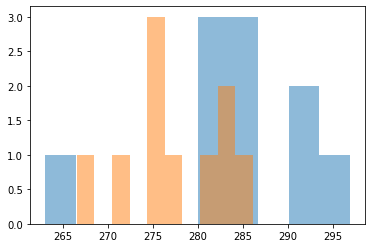

DescribeResult(nobs=10, minmax=(263.059776256545, 296.908571436848), mean=284.0009012635926, variance=86.06363134967563, skewness=-0.8883203522832341, kurtosis=0.8313758274792327)
DescribeResult(nobs=10, minmax=(266.555318518065, 286.116911188659), mean=277.45306644876564, variance=38.227989678004036, skewness=-0.26894012609228873, kurtosis=-0.9075583280863868)


In [13]:
# Now that I have the top 10/bottom 10 I can start comparing them using visualizations
plt.hist(top_10_edu['avg_math_8_score'], alpha = .5)
plt.hist(bottom_10_edu['avg_math_8_score'], alpha = .5)
plt.show()

print(stats.describe(top_10_edu['avg_math_8_score']))
print(stats.describe(bottom_10_edu['avg_math_8_score']))

# The average_math_8_score mean is 284 in the higher states and 277 in the lower states

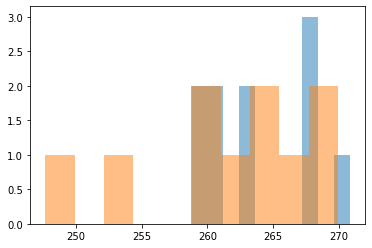

DescribeResult(nobs=10, minmax=(258.753761500039, 270.85371153052995), mean=263.92866759091515, variance=19.357392952727885, skewness=0.3057999745593817, kurtosis=-1.4727196169003087)
DescribeResult(nobs=10, minmax=(247.65344494672402, 269.956777592733), mean=261.8998372290115, variance=48.824880884017674, skewness=-0.857227789939472, kurtosis=-0.18211614572966273)


In [14]:
# This is the reading test scores and the results show a slight difference
# between the two categories of states in regards to reading score
plt.hist(top_10_edu['avg_reading_8_score'], alpha = .5)
plt.hist(bottom_10_edu['avg_reading_8_score'], alpha = .5)
plt.show()

print(stats.describe(top_10_edu['avg_reading_8_score']))
print(stats.describe(bottom_10_edu['avg_reading_8_score']))

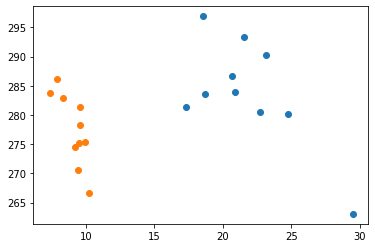

In [15]:
# I'm going to use a scatterplot to show the data for Math scores based on how much money_per_student
money_high = top_10_edu['money_per_student'] 
money_low = bottom_10_edu['money_per_student']
score_high = top_10_edu['avg_math_8_score']
score_low = bottom_10_edu['avg_math_8_score']


plt.scatter(money_high,score_high) 
plt.scatter(money_low, score_low)
plt.show()

A precursory look at the above scatterplot seems to suggest there is a slight correlation between the amount of money spent on each student and the scores they earn on their 8th grade Math test.  I do see overlap as well so it doesn't seem like a very strong correlation.

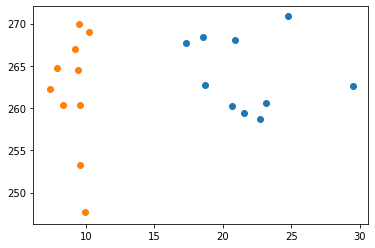

In [16]:
# I'm going to use a scatterplot to show the data for Reading scores based on how much money_per_student
money_high = top_10_edu['money_per_student'] 
money_low = bottom_10_edu['money_per_student']
score_high = top_10_edu['avg_reading_8_score']
score_low = bottom_10_edu['avg_reading_8_score']


plt.scatter(money_high,score_high) 
plt.scatter(money_low, score_low)
plt.show()

The reading scores seem to have less of a correlation when compared to the money spent per student.  This scatterplot shows a lot of overlap in scores when looking at the states that spent more on education compared to those that spent less per student.

Now that I have a feel for the data I went ahead and ran the tests on the entire dataset.  That information is below shows this and also includes the correlation test on the entire dataset.

In [21]:
# I started off dropping the NaN values from the dataset
states.dropna(inplace=True)


In [22]:
# Making the columns in this new dataframe all lowercase
states.columns = states.columns.str.lower()


In [23]:
# I want to focus on the columns that I need for my hypothesis
states = states[['state', 'year', 'enroll', 'total_expenditure', 'avg_math_8_score', 'avg_reading_8_score']]
states.head()

,state,year,enroll,total_expenditure,avg_math_8_score,avg_reading_8_score
204,ALABAMA,1996,735912.0,3572283.0,256.594863,260.276441
206,ARIZONA,1996,764681.0,4391555.0,267.874834,263.283638
207,ARKANSAS,1996,452907.0,2297381.0,261.652745,271.834590
208,CALIFORNIA,1996,5460484.0,31561692.0,262.772478,269.197451
209,COLORADO,1996,655679.0,4075165.0,275.608214,268.168154


In [33]:
# This is creating the money_per_student column to show the amount of money spent on each student in a state
states['money_per_student'] = states['total_expenditure'] / states['enroll']
states.head()


,state,year,enroll,total_expenditure,avg_math_8_score,avg_reading_8_score,money_per_student
204,ALABAMA,1996,735912.0,3572283.0,256.594863,260.276441,4.854226
206,ARIZONA,1996,764681.0,4391555.0,267.874834,263.283638,5.742990
207,ARKANSAS,1996,452907.0,2297381.0,261.652745,271.834590,5.072523
208,CALIFORNIA,1996,5460484.0,31561692.0,262.772478,269.197451,5.780017
209,COLORADO,1996,655679.0,4075165.0,275.608214,268.168154,6.215183


<function matplotlib.pyplot.show(*args, **kw)>

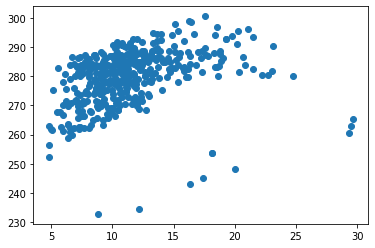

In [25]:
# This will show all of the math scores based on the money spent per student
total_money = states['money_per_student']
total_score_math = states['avg_math_8_score']

plt.scatter(total_money, total_score_math)
plt.show

In [27]:
total_money.corr(total_score_math)

0.3023834185681676

The above scatterplot makes it pretty clear that most states spend in the 5-15 range per student and that those scores are generally in the same range as some of the states that spend more per student.  A few outliers show lower scores even with a higher average per student amount of spending.

<function matplotlib.pyplot.show(*args, **kw)>

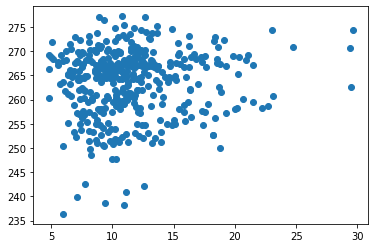

In [26]:
# This will show all of the reading scores based on the money spent per student
total_money = states['money_per_student']
total_score_read = states['avg_reading_8_score']

plt.scatter(total_money, total_score_read)
plt.show

In [28]:
total_money.corr(total_score_read)

0.07953268538545705

The correlation number for Math shows a weak correlation between the amount of money spent on education by a state and the overall Math Scores.  For the Reading scores it is almost non-existant.  This shows me that simply spending more money on education does not guarantee that students will have a higher level of achievement.   

In [29]:
# The last section of this is going to test whether students that score well in Math also score well in Reading or vice-versa
stats.ttest_ind(total_score_math, total_score_read)

Ttest_indResult(statistic=27.369968565005916, pvalue=7.96251966409655e-118)

Given the p-value from this last test I am able to reject the null hypothesis that the total Math Scores and the total Reading scores have no relationship with each other.